# Day 09 – Pandas for Analytics: SaaS Churn & Engagement Data

Understand how to analyze churn and engagement patterns in SaaS businesses using Pandas.

**Objectives:**
- Load & clean churn dataset
- Calculate churn rate
- Compare engagement metrics between churned and active users
- Group by plan types and visualize insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

np.random.seed(42)

## 1. Generate / Load Dataset

In [2]:
# Simulate SaaS churn dataset
n = 500
user_id = np.arange(1, n+1)
signup_dates = pd.date_range(start='2023-01-01', periods=n, freq='D')
last_active_dates = signup_dates + pd.to_timedelta(np.random.randint(30, 400, size=n), unit='D')
plan_types = np.random.choice(['Free', 'Basic', 'Pro', 'Enterprise'], size=n, p=[0.3, 0.3, 0.3, 0.1])
logins = np.random.poisson(lam=30, size=n)
sessions = np.random.poisson(lam=10, size=n)
avg_session_time = np.random.normal(loc=25, scale=5, size=n)
churned = np.random.choice([0, 1], size=n, p=[0.75, 0.25])

df = pd.DataFrame({
    'user_id': user_id,
    'signup_date': signup_dates,
    'last_active_date': last_active_dates,
    'plan_type': plan_types,
    'logins': logins,
    'sessions': sessions,
    'avg_session_time': avg_session_time,
    'churned': churned
})

df.head()

,user_id,signup_date,last_active_date,plan_type,logins,sessions,avg_session_time,churned
0,1,2023-01-01,2023-05-13,Pro,34,15,30.357057,0
1,2,2023-01-02,2024-01-15,Pro,38,10,35.100246,0
2,3,2023-01-03,2023-10-30,Free,24,11,29.833802,0
3,4,2023-01-04,2023-05-20,Free,29,9,26.652867,1
4,5,2023-01-05,2023-04-16,Pro,29,18,33.169741,0


## 2. Data Overview & Cleaning

In [3]:
df.info()
df.describe()

# Check missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           500 non-null    int64         
 1   signup_date       500 non-null    datetime64[ns]
 2   last_active_date  500 non-null    datetime64[ns]
 3   plan_type         500 non-null    object        
 4   logins            500 non-null    int32         
 5   sessions          500 non-null    int32         
 6   avg_session_time  500 non-null    float64       
 7   churned           500 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int32(2), int64(2), object(1)
memory usage: 27.5+ KB


## 3. Churn Analysis

In [4]:
# Overall churn rate
churn_rate = df['churned'].mean() * 100
print(f'Overall Churn Rate: {churn_rate:.2f}%')

# Compare engagement of churned vs active users
engagement_summary = df.groupby('churned')[['logins', 'sessions', 'avg_session_time']].mean()
engagement_summary

Overall Churn Rate: 20.40%


,logins,sessions,avg_session_time
churned,,,
0,30.155779,10.047739,24.739108
1,29.352941,9.696078,24.792087


## 4. Plan-Based Analysis

plan_type
Basic         23.376623
Pro           20.289855
Free          18.791946
Enterprise    16.949153
Name: churned, dtype: float64


C:\Users\vedav\AppData\Local\Temp\ipykernel_1444\357444836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plan_churn.index, y=plan_churn.values, palette='coolwarm')


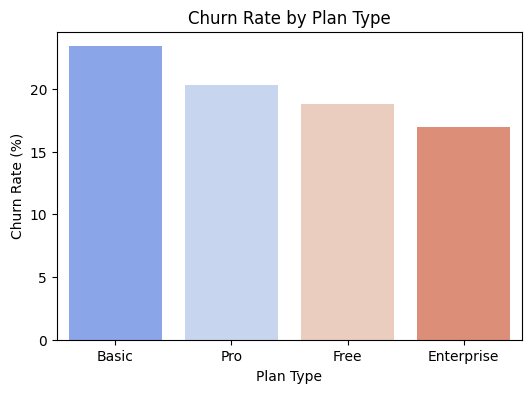

In [5]:
plan_churn = df.groupby('plan_type')['churned'].mean().sort_values(ascending=False) * 100
print(plan_churn)

# Plot churn by plan
plt.figure(figsize=(6,4))
sns.barplot(x=plan_churn.index, y=plan_churn.values, palette='coolwarm')
plt.title('Churn Rate by Plan Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Plan Type')
plt.show()

## 5. Time-Based Analysis

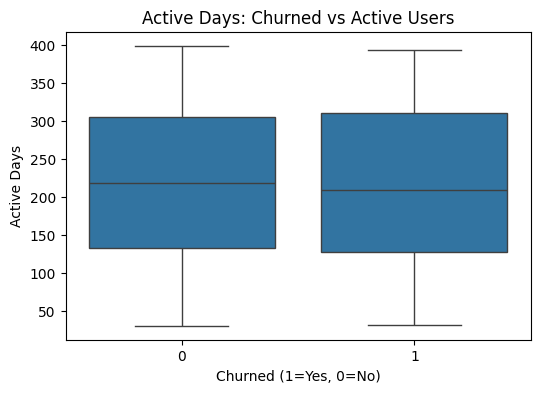

In [6]:
df['active_days'] = (df['last_active_date'] - df['signup_date']).dt.days

plt.figure(figsize=(6,4))
sns.boxplot(x='churned', y='active_days', data=df)
plt.title('Active Days: Churned vs Active Users')
plt.xlabel('Churned (1=Yes, 0=No)')
plt.ylabel('Active Days')
plt.show()

## 6. Correlation Heatmap

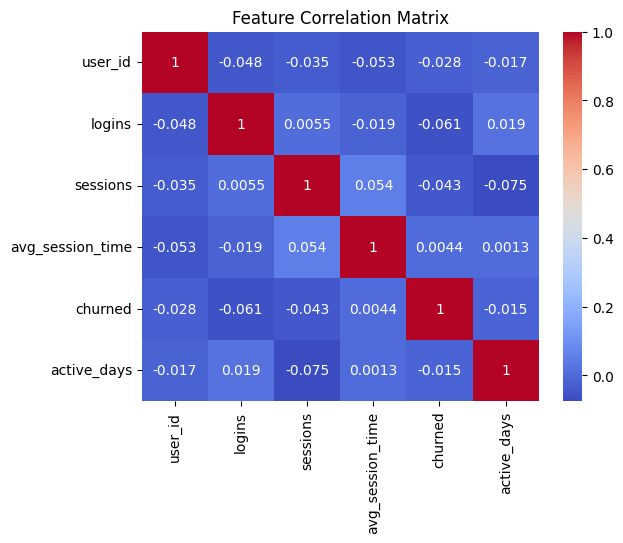

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## 7. Key Insights
- Churn rate reveals customer retention strength.
- Pro and Enterprise users likely show lower churn.
- Engagement metrics (logins, sessions) are strong retention signals.
- Time-on-platform correlates negatively with churn (longer use → more loyal).